# Track particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2024-10-24"

n_particles = 4
video_name = "23_05_23_3_1080"
partition = 0
t0 = int(partition * 1e4)
tf = int((partition + 1) * 1e4)
if partition == 8:
    tf = 90650  # Total number of frames in video
times = np.arange(t0, tf, 1)  # num_frames
save_tracking = False
x_bounds = [40, 1020]
y_bounds = [160, 1740]
x_zoom = [760, 1000]
y_zoom = [1500, 1720]
print("Tracked frames from", times[0], "to", times[-1])

Tracked frames from 0 to 9999


## Setting video information

In [3]:
# Load the video
reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# Check the number of frames
num_frames = reader.count_frames()
print("Total frames: {}".format(num_frames))

# Extract a frame to inspect the content
time = 0
frame = reader.get_data(time)
print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

Total frames: 90650
Frames resolution: 1080 x 1920


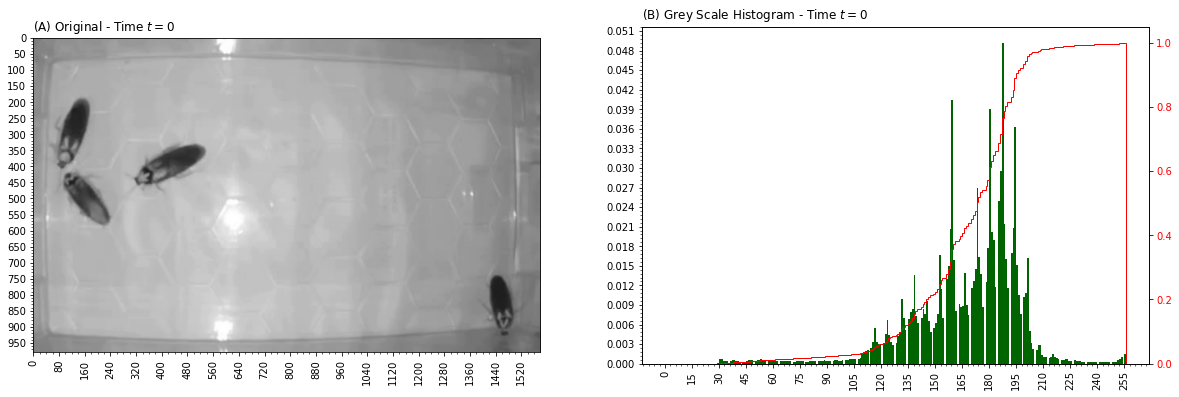

In [4]:
# Original Frame
time = 0
width = 10
width_ratio = 1
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]

plt_tp.plot_normal_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

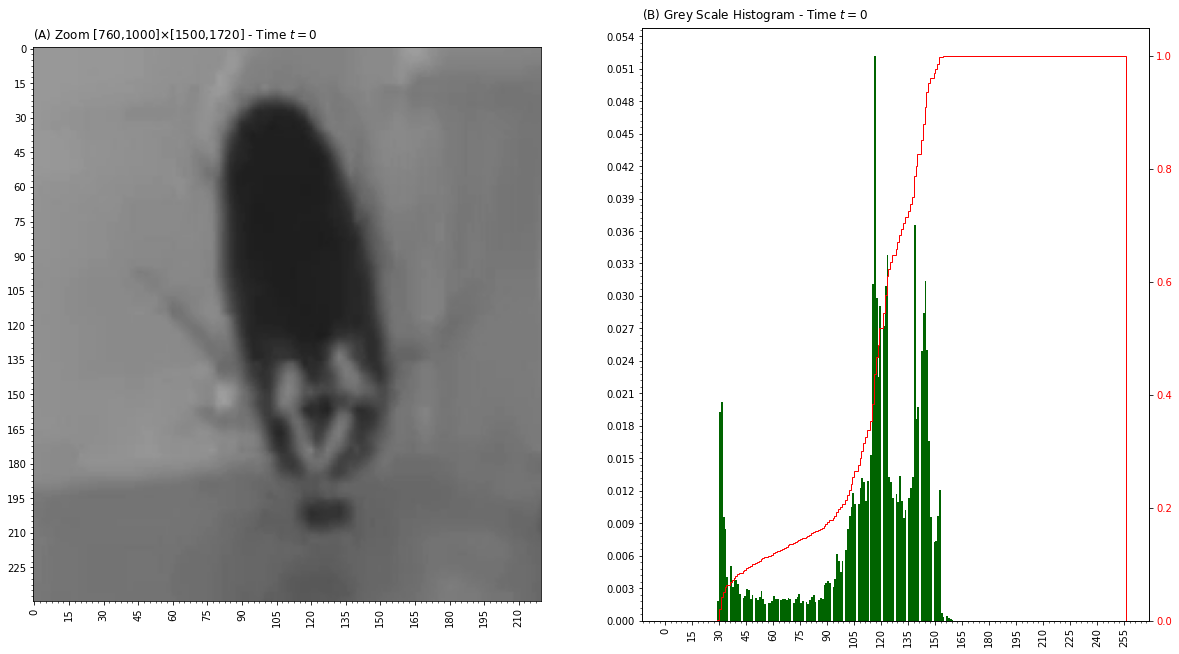

In [5]:
# Zooming particle
time = 0
width = 10
width_ratio = 1
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = [760, 1000]
y_zoom = [1500, 1720]

plt_tp.plot_normal_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Profiling video information

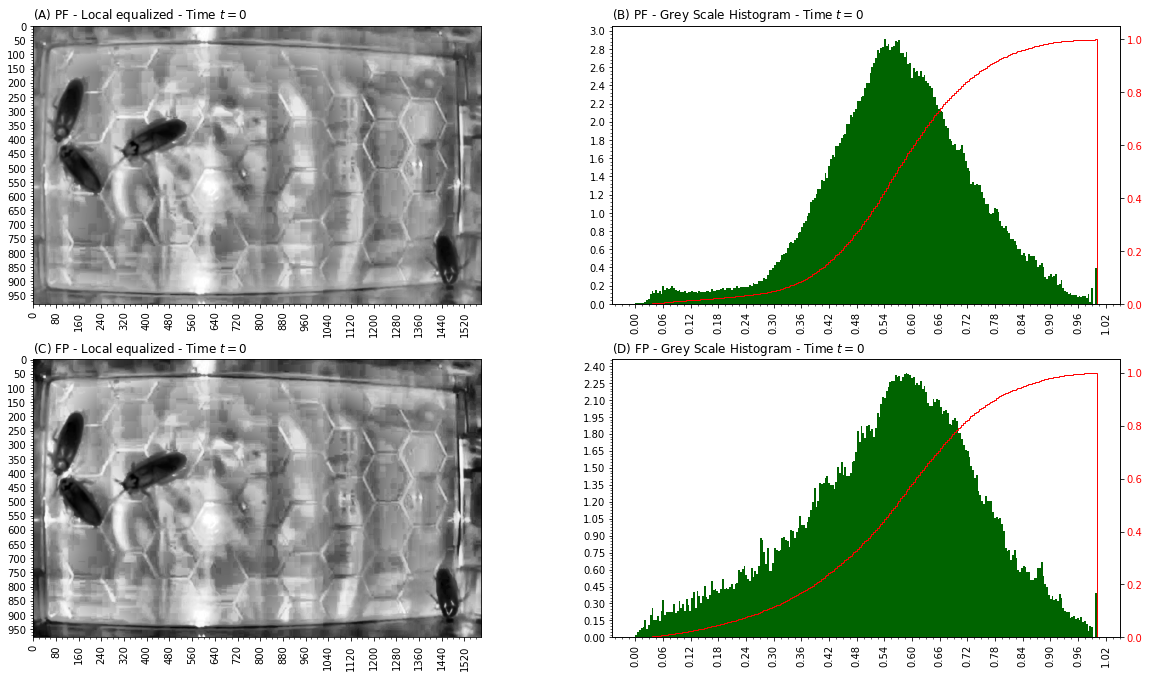

In [6]:
# Original Frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]

plt_tp.plot_profiled_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Boundaries and contours definition

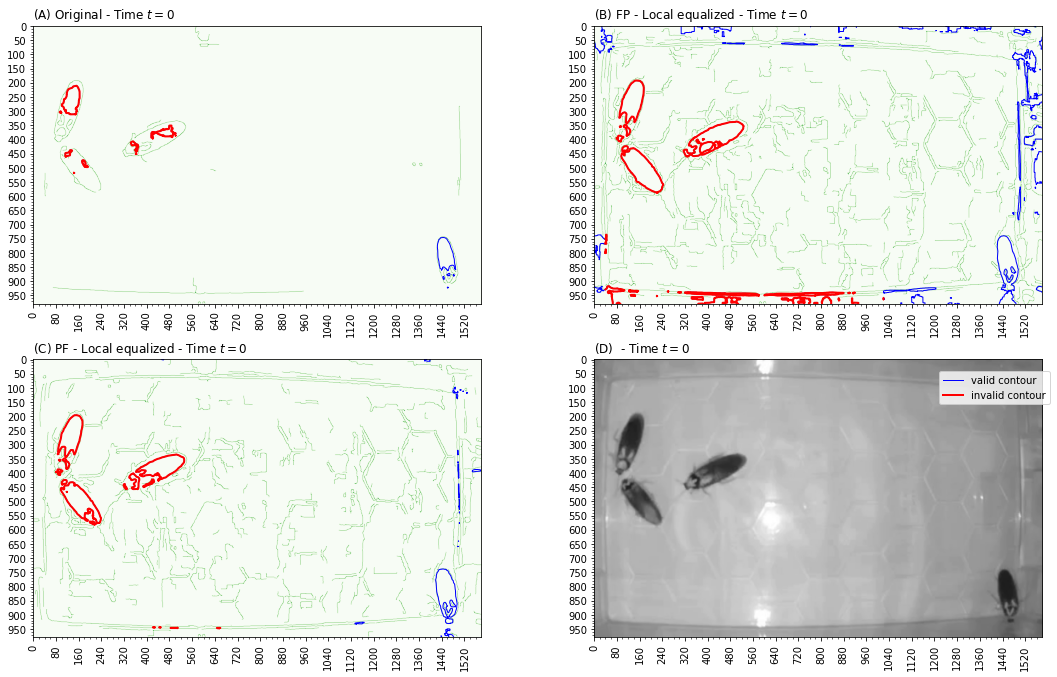

In [7]:
# Original frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]
fancy_legend = True
x_legend = 0.83
y_legend = 0.46

plt_tp.plot_boundary_edge_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

## Do tracking algorithm

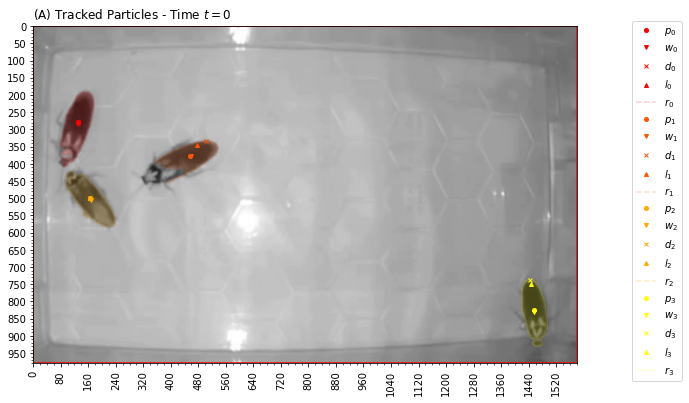

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number
19,0,0,131.361,277.048,129.820,282.752,nan,131.361,277.048,nan,131.361,277.048,[144 145 146 ... 91 92 93],[192 192 192 ... 408 408 408],-0.285,9039.000,12978.000,9050.000,196.579,71.365,0.932,-38
24,1,0,456.948,377.037,457.656,377.513,0.000,503.000,333.000,0.627,476.000,345.000,[503 504 505 ... 388 386 387],[333 333 333 ... 456 457 457],-1.280,8631.000,12656.000,8636.000,165.988,72.911,0.898,-22
37,2,0,164.068,499.940,167.470,504.772,nan,164.068,499.940,nan,164.068,499.940,[106 107 108 ... 217 216 217],[423 423 423 ... 585 586 586],0.739,9789.000,12576.000,9829.000,187.418,74.961,0.917,-20
57,3,0,1455.613,823.844,1456.774,830.276,0.000,1445.000,738.000,0.459,1447.000,749.000,[1445 1437 1438 ... 1466 1467 1468],[738 739 739 ... 930 930 930],0.155,9123.000,10618.000,9917.000,190.276,68.388,0.933,-25


In [8]:
# Original frame
time = 0
reinforce_boundaries = True
remove_holes = False
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 1.5
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]
fancy_legend = True
x_legend = 1.001
y_legend = 0.891

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    time=time,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

df_tracked_frame.style.format(precision=3)

### All frames

In [9]:
# Original frame
reinforce_boundaries = True
remove_holes = False
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 1.5
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20

df_tracked_frames = tp.process_multiple_frames(
    reader=reader,
    times=times,
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    clip_limit=clip_limit,
    type=type,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max
)

df_tracked_frames.head(n_particles)

100%|█████████████████| 10000/10000 [08:56<00:00, 18.65it/s]


,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number,id_count
0,0,0,131.361102,277.047904,129.820192,282.752376,NaN,131.361102,277.047904,NaN,131.361102,277.047904,"[144, 145, 146, 147, 148, 149, 150, 151, 152, ...","[192, 192, 192, 192, 192, 192, 192, 192, 192, ...",-0.284792,9039.0,12978.0,9050.0,196.579324,71.364684,0.931776,-38,4
1,1,0,456.948442,377.037307,457.656262,377.513295,0.0,503.000000,333.000000,0.627451,476.000000,345.000000,"[503, 504, 505, 506, 507, 500, 501, 502, 504, ...","[333, 333, 333, 333, 333, 334, 334, 334, 334, ...",-1.279919,8631.0,12656.0,8636.0,165.988477,72.910703,0.898364,-22,4
2,2,0,164.068444,499.940035,167.470318,504.772246,NaN,164.068444,499.940035,NaN,164.068444,499.940035,"[106, 107, 108, 109, 110, 111, 112, 113, 114, ...","[423, 423, 423, 423, 423, 423, 423, 423, 423, ...",0.738668,9789.0,12576.0,9829.0,187.418000,74.960595,0.916531,-20,4
3,3,0,1455.613066,823.843911,1456.773911,830.276236,0.0,1445.000000,738.000000,0.458824,1447.000000,749.000000,"[1445, 1437, 1438, 1441, 1442, 1443, 1444, 144...","[738, 739, 739, 739, 739, 739, 739, 739, 739, ...",0.155444,9123.0,10618.0,9917.0,190.276157,68.388433,0.933177,-25,4


## Update incorrect tracked frames

In [10]:
times_new = df_tracked_frames[df_tracked_frames["id_count"] < n_particles]["time"].unique()
remove_holes_new = True
threshold_new = 0.11
sigma_new = 0.9
print("Incorrect tracking particles at {} times:\n{}".format(len(times_new), times_new))

df_tracked_frames_new = tp.process_multiple_frames(
    reader=reader,
    times=times_new,
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes_new,
    clip_limit=clip_limit,
    type=type,
    threshold=threshold_new,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max
)
times_new_2 = df_tracked_frames_new[df_tracked_frames_new["id_count"] < n_particles]["time"].unique()
print("Apply again tracking algorithm with stronger threshold and removing holes")
print("Persistent particles untracked at {} times:\n{}".format(len(times_new_2), times_new_2))

Incorrect tracking particles at 1938 times:
[  34   39   40 ... 8642 8643 8644]


100%|███████████████████| 1938/1938 [01:11<00:00, 27.18it/s]


Apply again tracking algorithm with stronger threshold and removing holes
Persistent particles untracked at 247 times:
[ 766  775 1655 1744 1746 1754 1755 1776 1777 1779 1780 1781 1784 1790
 1791 1792 1824 1842 1843 1911 1912 1913 1916 1976 1977 1978 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2008 2017 2019 2020 2041 2045
 2046 2047 2049 2050 2051 2052 2053 2054 2055 2056 2059 2060 2061 2062
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2087 2088 2089 2090 2091 2092
 2093 2094 2095 2097 2098 2101 2106 2107 2109 2110 2111 2112 2132 2235
 2239 6530 6550 6592 6596 6610 6634 6667 6674 6675 6676 6677 6678 6679
 6681 6685 6725 6726 6727 6729 6730 6731 6732 6733 6734 6771 6790 6791
 6796 6798 6799 6810 6815 6820 6826 6827 6828 6829 6835 6836 6837 6838
 6840 6859 6868 6882 6894 6902 6903 6904 6905 6906 6907 6908 6915 6916
 6940 6944 6945 6946 6957 695

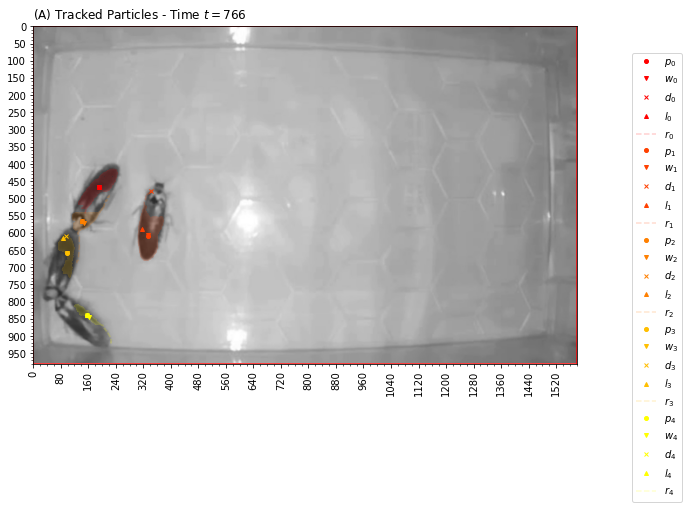

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number
13,0,766,192.114841,465.617491,191.947630,466.590096,NaN,192.114841,465.617491,NaN,192.114841,465.617491,"[225, 226, 227, 228, 229, 230, 231, 232, 233, ...","[416, 416, 416, 416, 416, 416, 416, 416, 416, ...",-0.810371,4528.0,6205.0,4530.0,148.234276,42.641715,0.957731,-6
20,1,766,332.905618,609.916002,333.782629,607.649093,0.0,342.000000,479.000000,0.584314,317.000000,588.000000,"[342, 343, 340, 341, 342, 343, 344, 339, 340, ...","[479, 479, 480, 480, 480, 480, 480, 481, 481, ...",0.014904,5393.0,10066.0,5398.0,152.583390,65.875652,0.902000,-10
29,2,766,143.253629,567.086251,146.332511,572.182533,NaN,143.253629,567.086251,NaN,143.253629,567.086251,"[222, 221, 221, 220, 221, 219, 220, 218, 219, ...","[491, 492, 493, 494, 494, 495, 495, 496, 496, ...",-0.395048,1171.0,8537.0,1173.0,128.769008,78.346058,0.793613,-12
71,3,766,98.881534,659.025119,98.902508,659.151320,0.0,95.000000,608.000000,0.231373,87.000000,616.000000,"[95, 96, 93, 94, 95, 96, 97, 98, 99, 92, 93, 9...","[608, 608, 609, 609, 609, 609, 609, 609, 609, ...",0.082855,2946.0,3993.0,2946.0,127.229792,39.321128,0.951044,1
97,4,766,155.015330,838.772406,161.940026,844.634986,NaN,155.015330,838.772406,NaN,155.015330,838.772406,"[128, 129, 130, 130, 131, 122, 123, 131, 132, ...","[809, 809, 809, 810, 810, 811, 811, 811, 811, ...",0.851092,848.0,3156.0,849.0,129.751652,19.306291,0.988868,-3


In [11]:
# Original frame
if len(times_new_2) == 0:
    times_new_2 = [t0]
time = times_new_2[0]
reinforce_boundaries = True
type = "local equalized"
clip_limit = 0.05
x_bounds = x_bounds  # [240, 900]
y_bounds = y_bounds  # [300, 1460]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom  # [760, 880]
y_zoom = None  # y_zoom  # [320, 520]
fancy_legend = True
x_legend = 1.001
y_legend = 0.821

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes_new,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold_new,
    sigma=sigma_new,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    time=time,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

df_tracked_frame


In [12]:
df_tracked_frames_final = pd.concat([df_tracked_frames, df_tracked_frames_new], ignore_index=True)
df_tracked_frames_final = (df_tracked_frames_final[
    df_tracked_frames_final["id_count"] == df_tracked_frames_final.groupby(["time", "id"])["id_count"].transform("max")
])
df_tracked_frames_final = df_tracked_frames_final.drop_duplicates(subset=["id", "time"], keep="first").sort_values(["time", "id"])

cols = ["id", "time", "id_count", "position_x", "position_y"]
print("First iteration: Tracking with threshold {}".format(threshold))
print(df_tracked_frames[df_tracked_frames["time"] == times_new_2[0]][cols])
print("\nSecond iteration: Tracking with threshold {}".format(threshold_new))
print(df_tracked_frames_new[df_tracked_frames_new["time"] == times_new_2[0]][cols])
print("\nFinal tracked data")
print(df_tracked_frames_final[df_tracked_frames_final["time"] == times_new_2[0]][cols])

First iteration: Tracking with threshold 0.19
      id  time  id_count  position_x  position_y
3243   0   766         3  145.709542  561.532440
3244   1   766         3  343.175349  573.708664
3245   2   766         3  133.031982  853.352153

Second iteration: Tracking with threshold 0.11
     id  time  id_count  position_x  position_y
249   0   766         3  182.337520  486.412350
250   1   766         3  332.850436  609.905548
251   2   766         3   98.881534  659.025119

Final tracked data
      id  time  id_count  position_x  position_y
3243   0   766         3  145.709542  561.532440
3244   1   766         3  343.175349  573.708664
3245   2   766         3  133.031982  853.352153


## Visualize final data

In [13]:
df_tracked_frames_final_ = df_tracked_frames_final.copy()
# Change coords of contours to str for correct loading of data as CSV
df_tracked_frames_final_["coords_x"] = df_tracked_frames_final_["coords_x"].apply(lambda x: " ".join(map(str, x)))
df_tracked_frames_final_["coords_y"] = df_tracked_frames_final_["coords_y"].apply(lambda x: " ".join(map(str, x)))

df_tracked_frames_final_.to_csv("{}/tracked_{}_{}.csv".format(output_path, video_name, partition), index=False)

In [14]:
# Original frame
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]
fancy_legend = True
x_legend = 1.050
y_legend = 0.951
interval = 500
fps = 2
output_name = "tracked_" + video_name + "_" + str(partition)

if save_tracking:
    plt_tp.plot_tracking_animation(
        reader=reader,
        df_tracked_frames=df_tracked_frames_final,
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        x_bounds=x_bounds,
        y_bounds=y_bounds,
        x_zoom=x_zoom,
        y_zoom=y_zoom,
        fancy_legend=fancy_legend,
        x_legend=x_legend,
        y_legend=y_legend,
        interval=interval,
        fps=fps,
        output_path=output_path,
        output_name=output_name
    )

In [15]:
df_tracked_frames_final["id_count"].value_counts(dropna=False, sort=False)

id_count
4     26728
5     10725
7      1435
6      3654
8       664
3       729
9       207
10       60
2         8
Name: count, dtype: int64